In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./../data/perrin-freres-monthly-champagne.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [5]:
df = df.dropna()

In [6]:
df.columns = ["month", "sales"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   105 non-null    object 
 1   sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [8]:
df["month"] = pd.to_datetime(df["month"])

In [9]:
df.set_index("month", inplace=True)

In [25]:
def adfuller_test(data):
    result = adfuller(data)
    print("Test Statistics: " ,result[0])
    print("p value: " ,result[1])
    print("#lags: " ,result[2])
    if(result[1] < 0.05):
        print("There is no unit root presence (Stationary)")
    else:
        print("There is a unit root presence (Non Stationary)")




In [26]:
adfuller_test(df["sales"])

Test Statistics:  -1.8335930563276195
p value:  0.3639157716602467
#lags:  11
There is a unit root presence (Non Stationary)


In [36]:
rolling_mean = df.rolling(window=13).mean()
rolling_std = df.rolling(window=13).std()

In [37]:
df["ma_sales"] = rolling_mean["sales"]
df["rolling_std_sales"] = rolling_std["sales"]

In [38]:
df.head(20)

,sales,ma_sales,rolling_std_sales,diff_sales,diff_sales2
month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,NaN,NaN,NaN,NaN
1964-03-01,2755.0,NaN,NaN,NaN,NaN
1964-04-01,2721.0,NaN,NaN,NaN,NaN
1964-05-01,2946.0,NaN,NaN,NaN,NaN
1964-06-01,3036.0,NaN,NaN,NaN,NaN
1964-07-01,2282.0,NaN,NaN,NaN,NaN
1964-08-01,2212.0,NaN,NaN,NaN,NaN
1964-09-01,2922.0,NaN,NaN,NaN,NaN


<Axes: xlabel='month'>

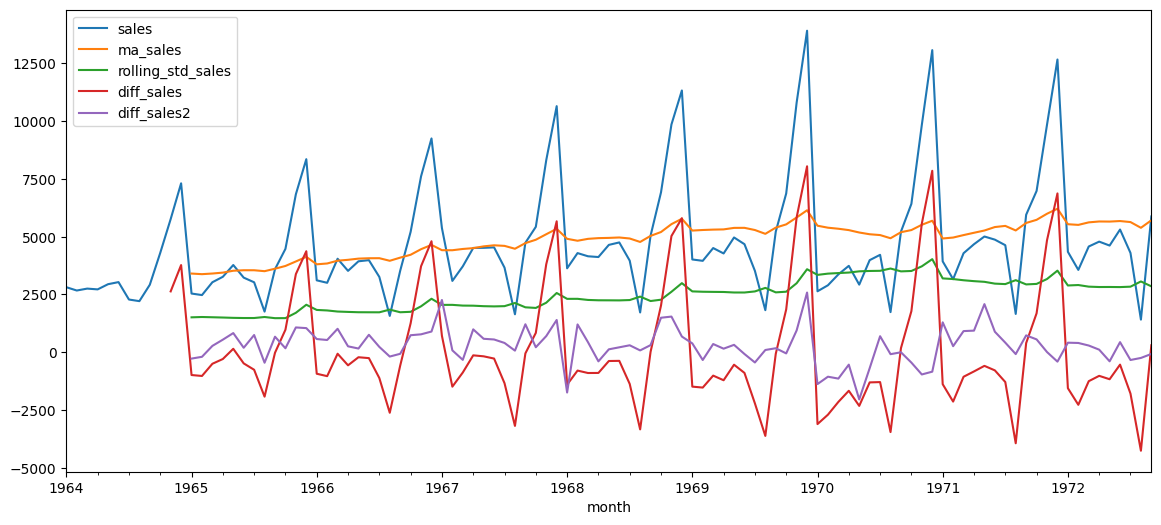

In [39]:
df.plot(figsize=(14,6))

In [40]:
df["diff_ma_sales"] = df["sales"] - df["ma_sales"]

In [41]:
adfuller_test(df["diff_ma_sales"].dropna())

Test Statistics:  -1.8508792920007286
p value:  0.35550981192254755
#lags:  12
There is a unit root presence (Non Stationary)


In [42]:
df["diff_12"] = df["sales"] - df["sales"].shift(12) 

In [43]:
adfuller_test(df["diff_12"].dropna())

Test Statistics:  -7.626619157213166
p value:  2.0605796968136632e-11
#lags:  0
There is no unit root presence (Stationary)
